# Supervised Learning - Foundations Project: ReCell

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.


### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.


### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [ ]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(color_codes=True)

# to split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to build linear regression_model using statsmodels
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Loading the dataset

In [ ]:
# loading the dataset
data = pd.read_csv("/content/drive/My Drive/used_device_data.csv")

data.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


**Observation:** Dataset has been loaded and display the first few rows of the dataset

## Checking the shape of the dataset

In [ ]:
data.shape ## Complete the code to get the shape of data

(3454, 15)

**Observation:** Display information about the number of rows and columns in the dataset

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

**Observation:** Display the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.

## Data Overview
Checking the data types of the columns for the dataset

- Observations
- Sanity checks

In [ ]:
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3454,34,Others,502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3454,4,Android,3214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3454.0,NaN,NaN,NaN,13.713115,3.80528,5.08,12.7,12.83,15.34,30.71
4g,3454,2,yes,2335,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3454,2,no,3302,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3275.0,NaN,NaN,NaN,9.460208,4.815461,0.08,5.0,8.0,13.0,48.0
selfie_camera_mp,3452.0,NaN,NaN,NaN,6.554229,6.970372,0.0,2.0,5.0,8.0,32.0
int_memory,3450.0,NaN,NaN,NaN,54.573099,84.972371,0.01,16.0,32.0,64.0,1024.0
ram,3450.0,NaN,NaN,NaN,4.036122,1.365105,0.02,4.0,4.0,4.0,12.0
battery,3448.0,NaN,NaN,NaN,3133.402697,1299.682844,500.0,2100.0,3000.0,4000.0,9720.0


**Observation:** Display the statistical summary of the dataset to get an overview of the numerical columns of the data
A total of 3454 entries and it included as following details:

Min is 0.19 and Max is 12.7

25% quartile is 12.83

50% quartile is 12.83

75% quartile is 15.34 and

The average "screen_size" is measured as 13.71. The standard deviation is measured as 3.80

# Checking for missing values

In [ ]:
df.duplicated().sum()

0

**Observation**: There are no duplicate values in the data.

In [ ]:
df.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

**Observation**: There are missing values in many columns.

In [ ]:
df=data.copy()

**Observation: ** Creating a copy of the data so that original data remains unchanged.

## Exploratory Data Analysis (EDA)


- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Univariate Analysis**

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram


In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

## EDA

- It is a good idea to explore the data once again after manipulating it.

**normalized_new_price**

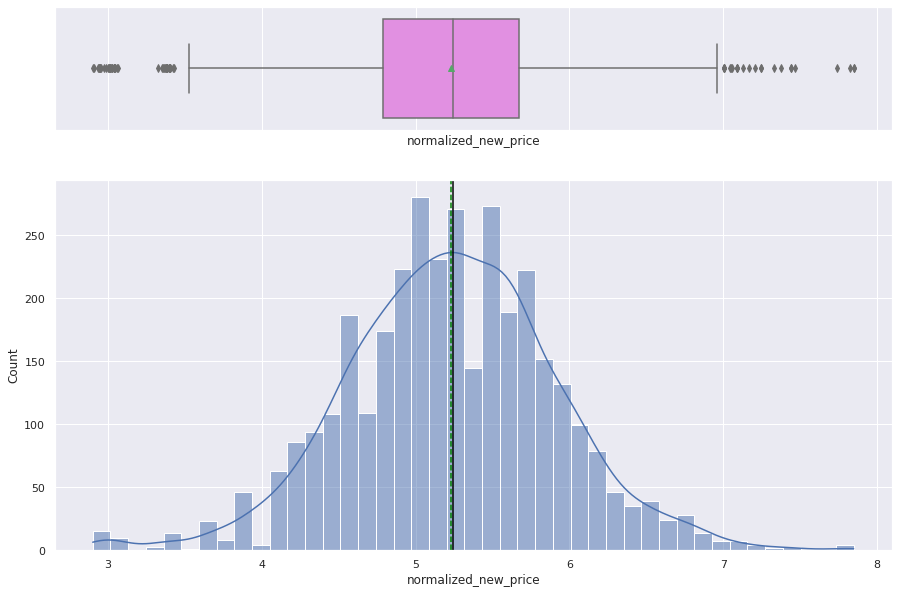

In [ ]:
histogram_boxplot(df, 'normalized_new_price', kde = True)  ## Complete the code to create histogram_boxplot for 'normalized_new_price'

**Observation: ** The distribution for normalized used price is showing a pattern of normal distribution.



**weight**

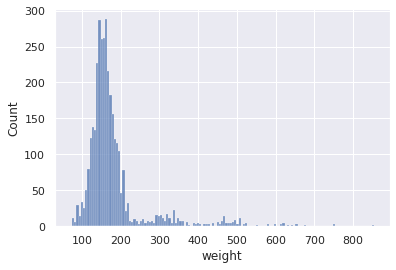

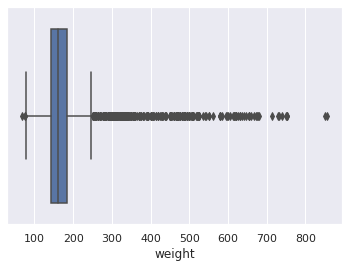

In [ ]:
#Language preferred
sns.histplot(data=df,x='weight')
plt.show()
sns.boxplot(data=df,x='weight')
plt.show()

**Observation:** It is observed from the pictoral the median time spent on the page is 150

**days_used**

In [ ]:
histogram_boxplot(df, 'days_used')  ## Complete the code to create histogram_boxplot for 'days_used'

Observation: The code to create histogram_boxplot for 'days_used'

**brand_name**

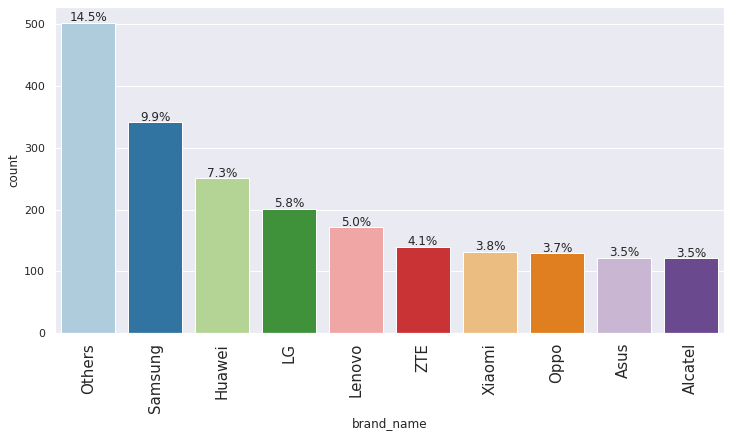

In [ ]:
labeled_barplot(df, "brand_name", perc=True, n=10)

Observation: The code to create histogram_boxplot for 'brand'

**os**
What percentage of the used device market is dominated by Android devices?

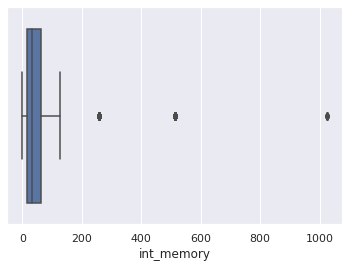

In [ ]:
#labeled_barplot(df, 'os', perc=True) ## Complete the code to create labeled_barplot for 'os'



Observation: Andoria operating system is dominated by more than 90%.

**RAM**

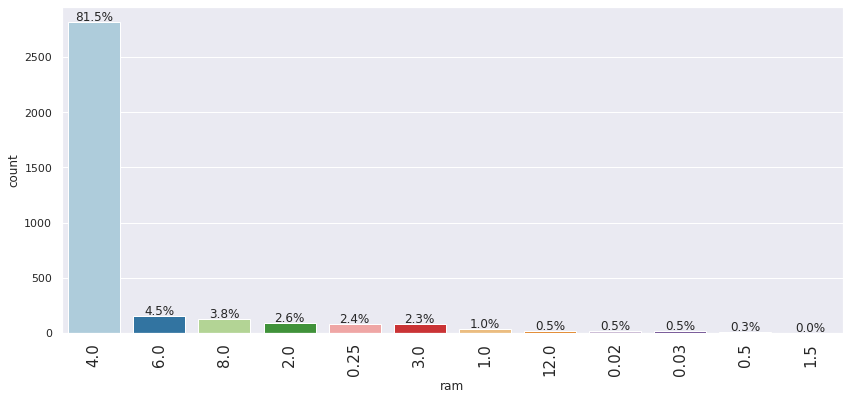

In [ ]:
labeled_barplot(df, 'ram', perc = True)

Observation:

**battery**

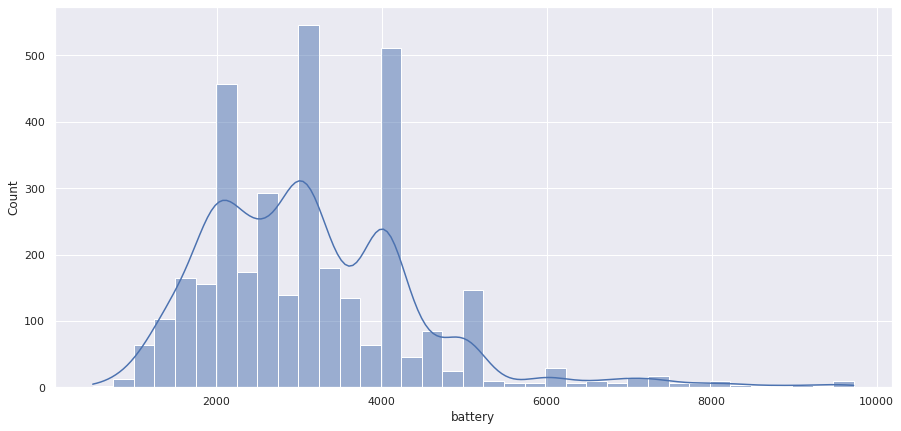

In [ ]:
plt.figure(figsize=(15, 7))
sns.histplot(data= df, x= "battery", kde= True);

**Observation: **

**screen_size**


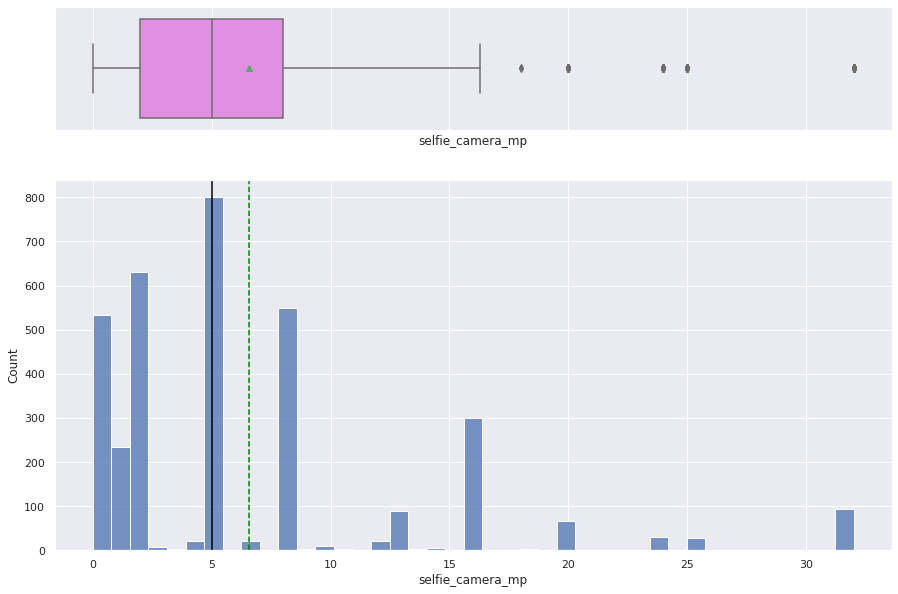

In [ ]:
histogram_boxplot(df, 'selfie_camera_mp')

**Observation: **

**selfie_camera_mp**

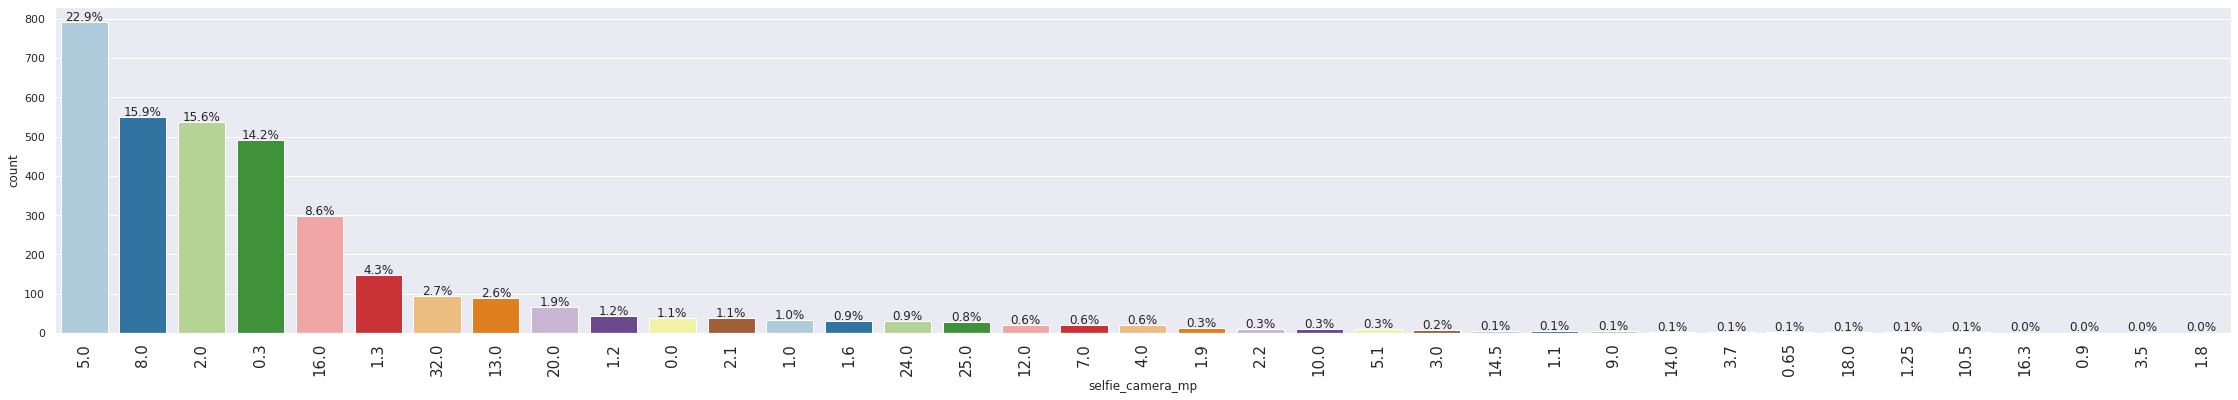

In [ ]:
labeled_barplot(df, 'selfie_camera_mp', perc = True)   ## Complete the code to create histogram_boxplot for 'selfie_camera_mp'

**Observation:** The number of people who have used selfie_camera_mp is hightly correlated with the number of people who

```
# This is formatted as code
```



**release_year**


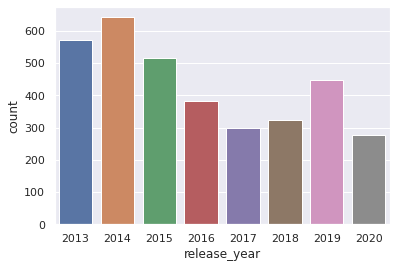

In [ ]:
#Language preferred
df['release_year'].value_counts()
# complete the code to plot the countplot
sns.countplot(data=df,x='release_year')
plt.show()

In [ ]:
df.groupby(['release_year'])['days_used'].mean()

release_year
2013    818.250877
2014    814.334891
2015    811.168932
2016    809.856397
2017    714.033445
2018    549.568323
2019    358.517937
2020    229.281588
Name: days_used, dtype: float64

**Observation: ** It observes that the release year from 2013 to 2015 have the relativley similar days used on the phone market.

**4g**

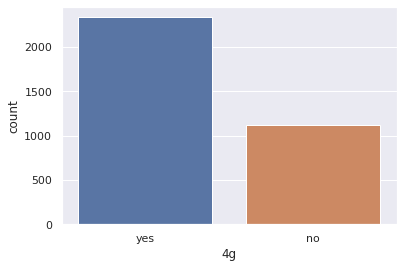

In [ ]:
# Converted
df['4g'].value_counts()
# complete the code to plot the countplot
sns.countplot(data=df,x='4g')
plt.show()

**Observation:** It is showed that 4g count is higher.

**5g**

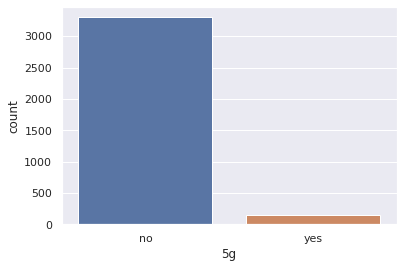

In [ ]:
# Converted
df['5g'].value_counts()
# complete the code to plot the countplot
sns.countplot(data=df,x='5g')
plt.show()

**Observation:** It is showed that 5g count is lower.

**Visualization**

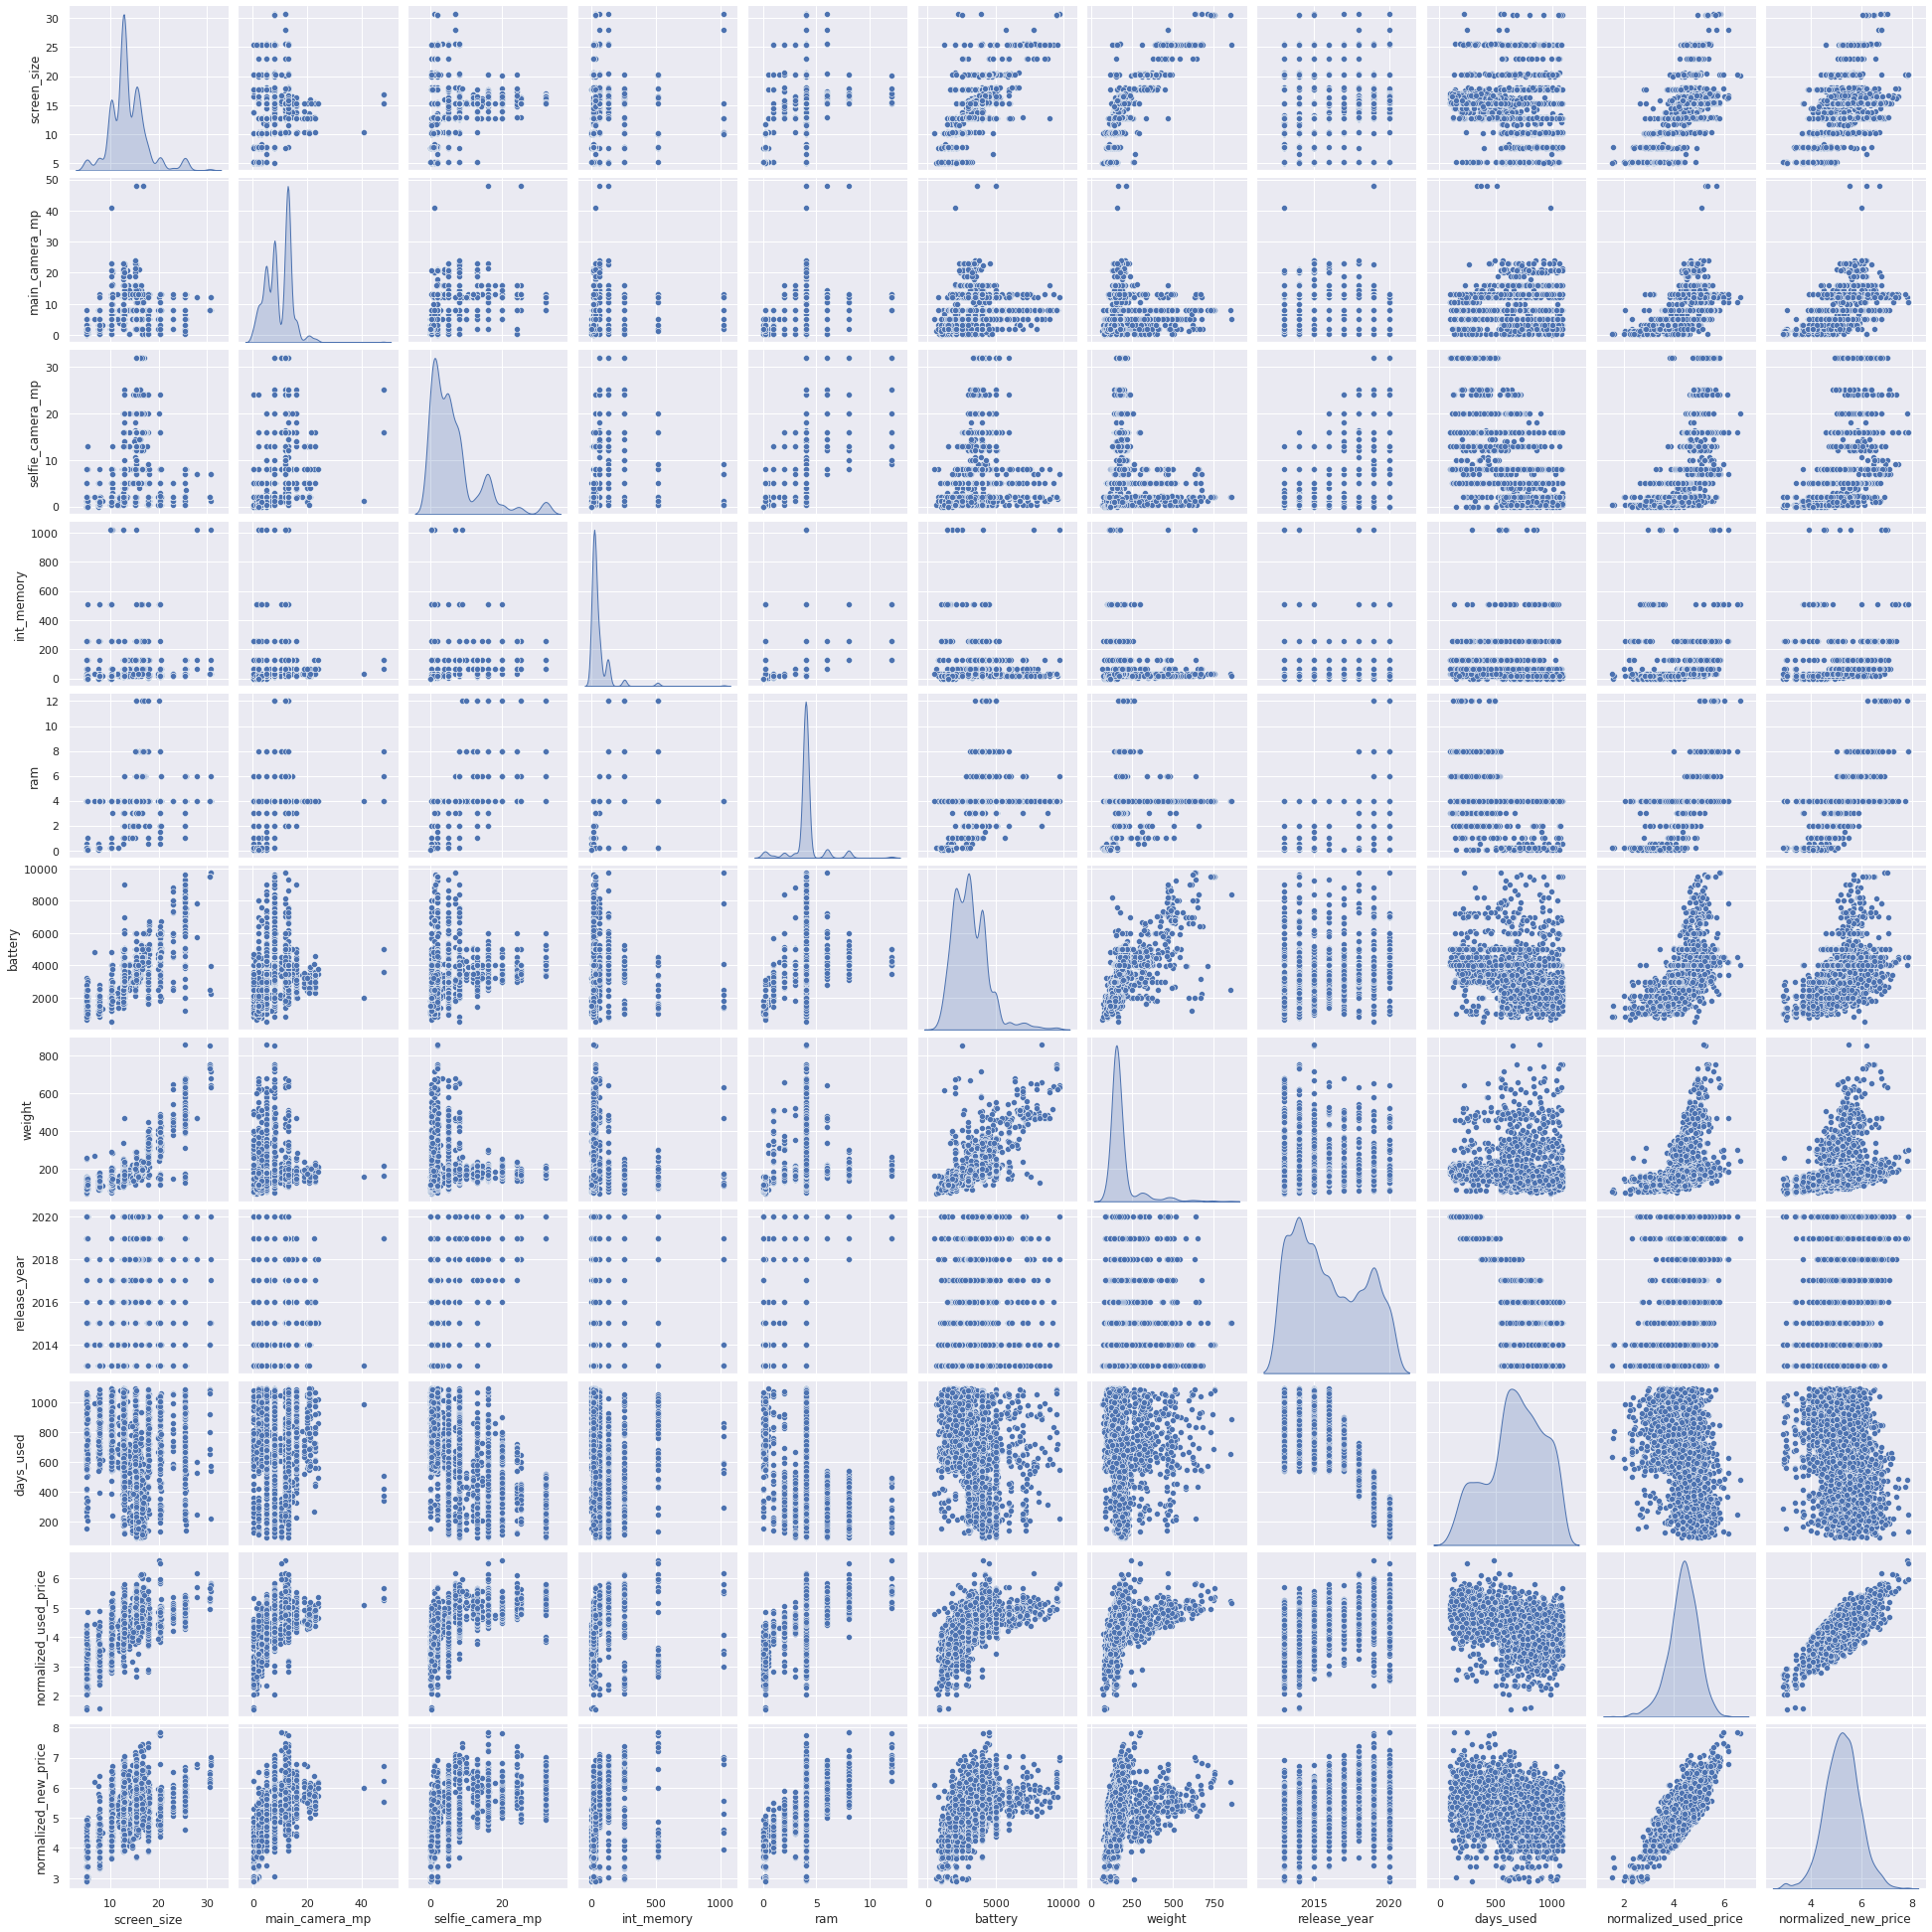

In [ ]:
sns.pairplot(df, diag_kind="kde");

**Observations:** To visualise how these numerical variables are associated with each other

#**Bivariate Analysis**


**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?



**Let's see how the price of used devices varies across the years.**

1. What does the distribution of normalized used device prices look like?

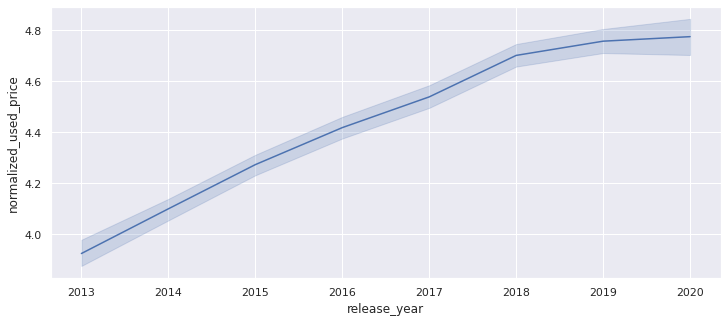

In [ ]:
plt.figure(figsize=(12, 5))
sns.lineplot(data = df, x = 'release_year' , y ='normalized_used_price') ## Complete the code to create a lineplot for release year and used price
plt.show()

**Observation** It is observed that release year from 2013 to 2020 increasting corresponding to normalized used price is increased in the phone market.

2. What percentage of the used device market is dominated by Android devices?

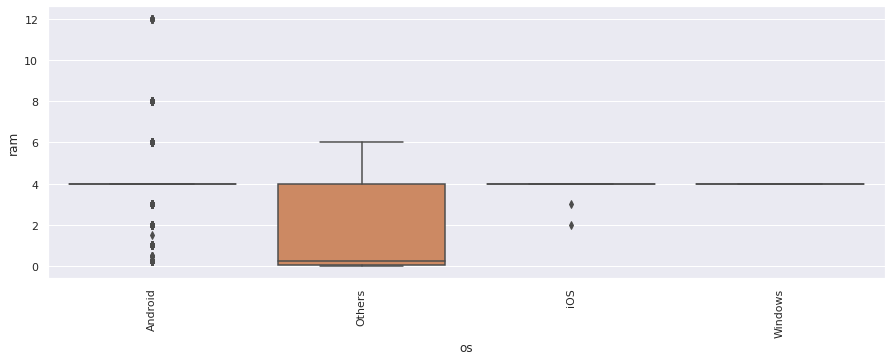

In [ ]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=df, x="os", y="ram")
plt.xticks(rotation=90)
plt.show()

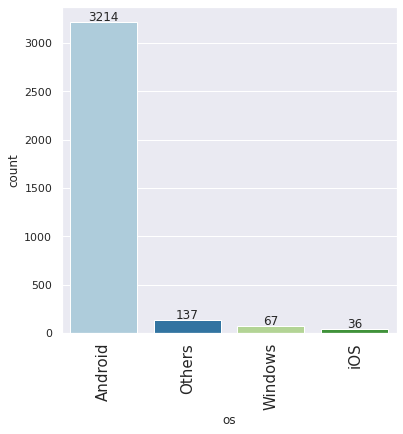

In [ ]:
labeled_barplot(df, 'os')

**Observation** It is observed that more than 90% used device market is  dominated by Android devices.

**3. The amount of RAM is important for the smooth functioning of a device. Let's see how the amount of RAM varies across brands.**


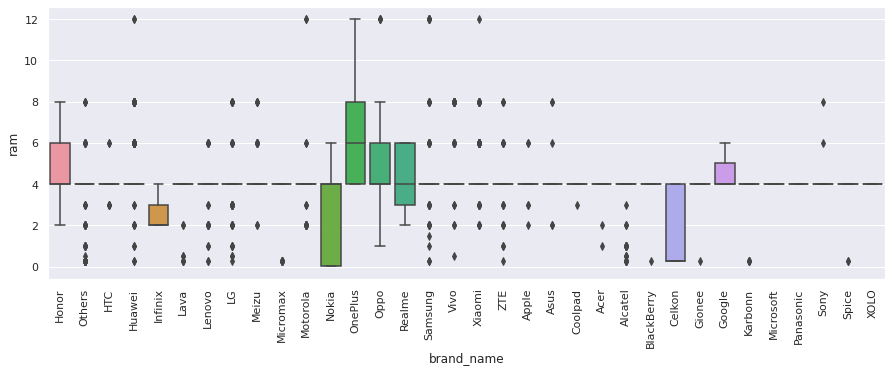

In [ ]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=df, x="brand_name", y="ram")
plt.xticks(rotation=90)
plt.show()

Observation: It is observed that the outlier are very low and very high. However, most of the brand_name is not demonstrating significant change for 4GB RAM.

**People who travel frequently require devices with large batteries to run through the day. But large battery often increases weight, making it feel uncomfortable in the hands. Let's create a new dataframe of only those devices which offer a large battery and analyze.**
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?

In [ ]:
df_large_battery = df[df.battery > 4500]
df_large_battery.shape

(341, 15)

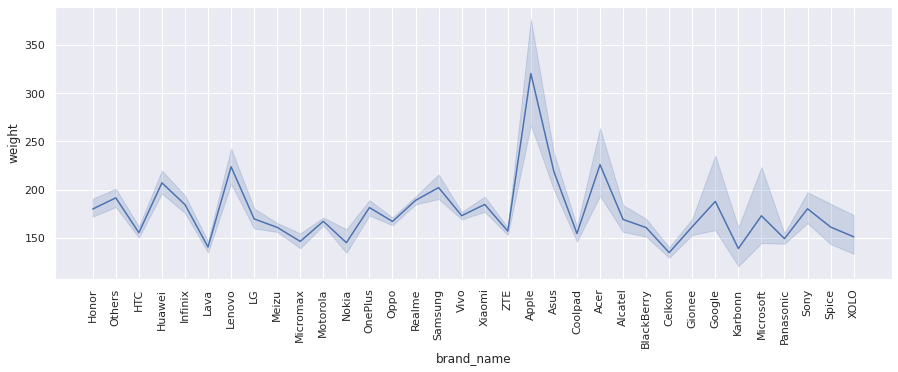

In [ ]:
plt.figure(figsize=(15, 5))
sns.lineplot(data=df, x='brand_name', y= 'weight') ## Complete the code to create a boxplot for 'brand_name' and 'weight'
plt.xticks(rotation=90)
plt.show()


**Observation:** The graph present hightest weight corresponding to brand name, apple and lowe with in karbonn amd lava.

**People who buy phones and tablets primarily for entertainment purposes prefer a large screen as they offer a better viewing experience. Let's create a new dataframe of only those devices which are suitable for such people and analyze.**
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?

In [ ]:
df_large_screen = df[df.screen_size > 6 * 2.54]
df_large_screen.shape

(1099, 15)

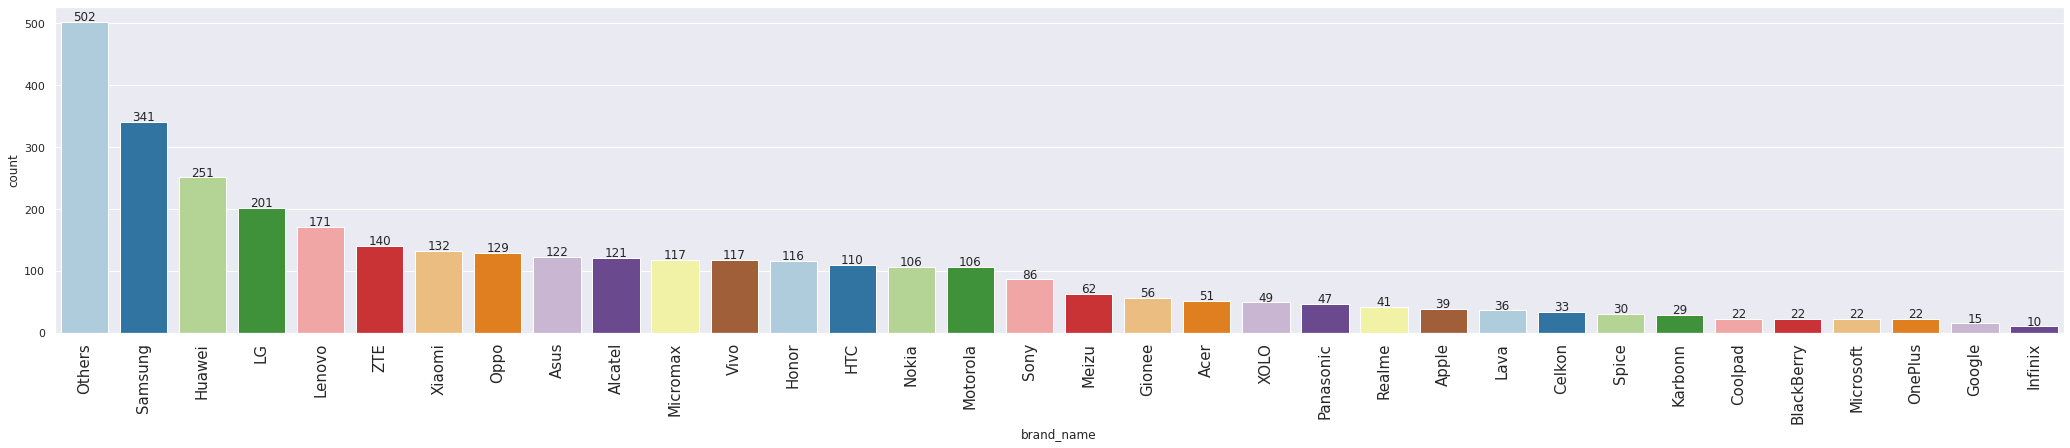

In [ ]:
labeled_barplot(df, 'brand_name') ## Complete the code to create labeled_barplot for 'brand_name' in large screen dataframe

**Observation:** The observation is higher for others samung

**Everyone likes a good camera to capture their favorite moments with loved ones. Some customers specifically look for good front cameras to click cool selfies. Let's create a new dataframe of only those devices which are suitable for this customer segment and analyze.**
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?

In [ ]:
df_selfie_camera = df[df.selfie_camera_mp > 8]
df_selfie_camera.shape

(655, 15)

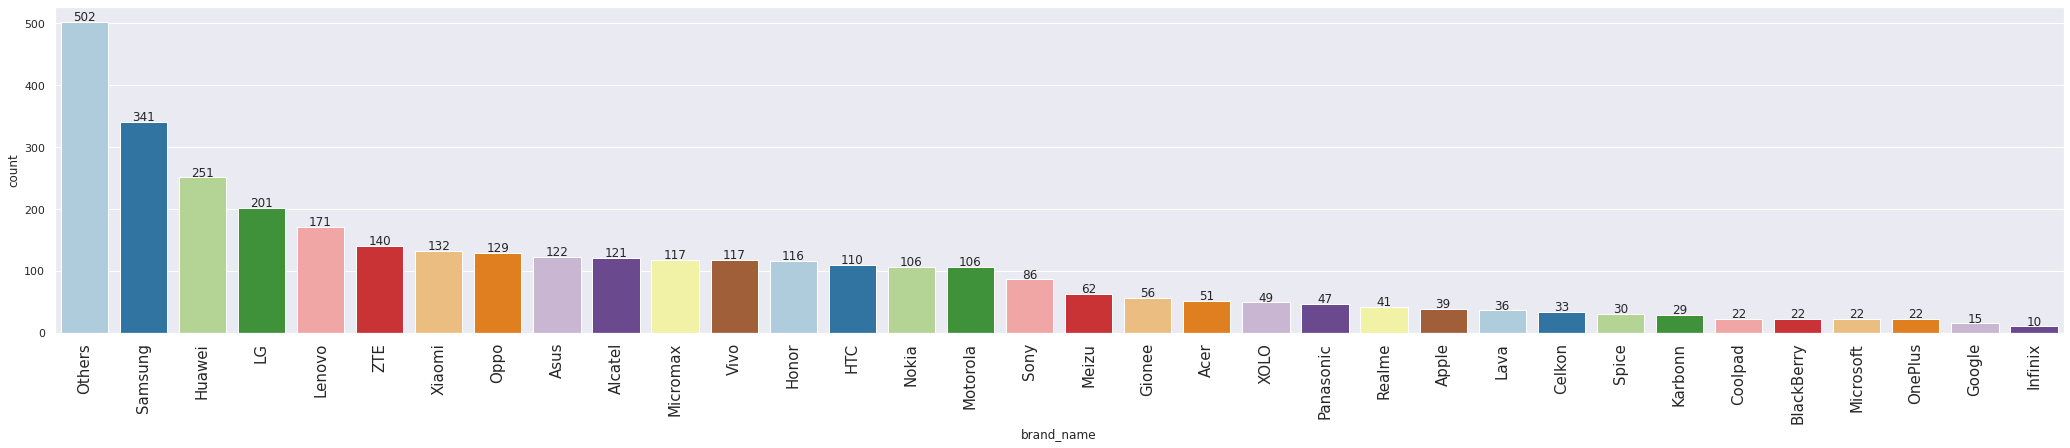

In [ ]:
labeled_barplot(df, 'brand_name') ## Complete the code to create labeled_barplot for 'brand_name' in high selfie camera dataframe

Observation: The labeled plot observed that the others samsung and huawei are the highest count and infinix and google are loweest brand_name in the phone market.

**Let's do a similar analysis for rear cameras.**

* Rear cameras generally have a better resolution than front cameras, so we set the threshold higher for them at 16MP.

In [ ]:
df_main_camera = df[df.main_camera_mp > 16]
df_main_camera.shape

(94, 15)

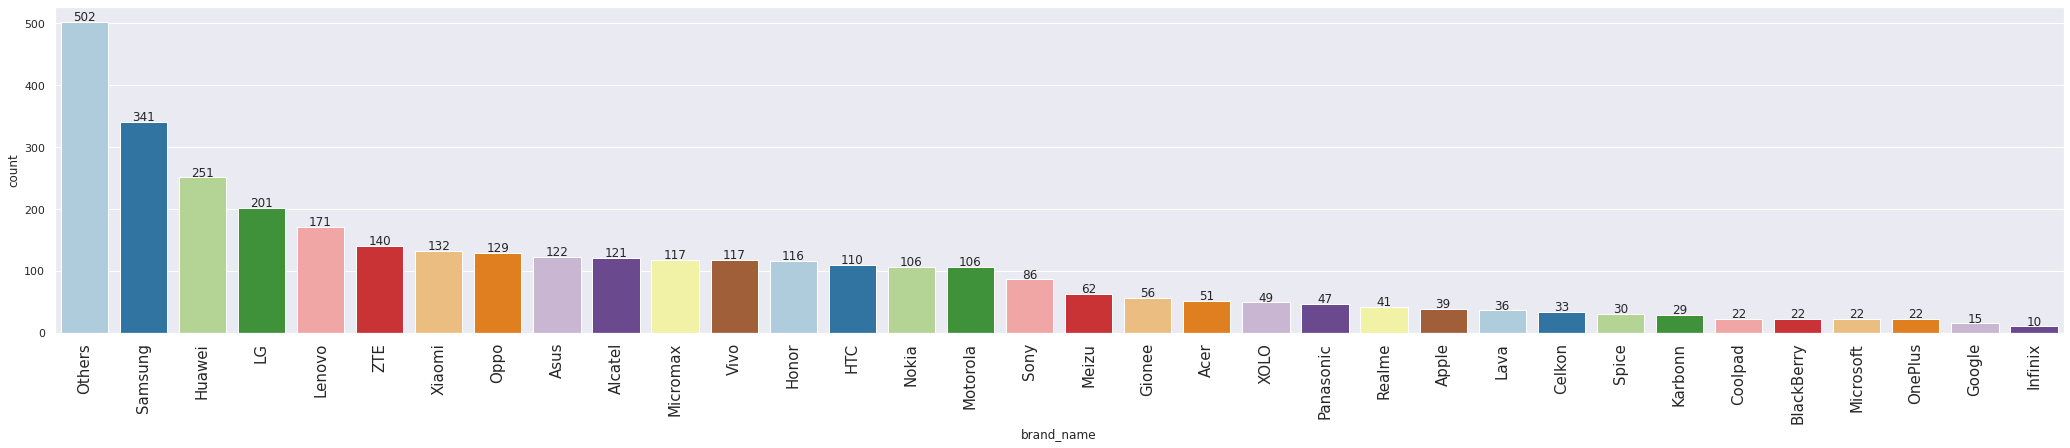

In [ ]:
labeled_barplot(df, 'brand_name') ## Complete the code to create labeled_barplot for 'brand_name' in high main camera dataframe

**Observation:**  We observed that others, Samsung cameras generally have a better resolution than front cameras, so we set the threshold higher for them at 16MP.

**Let's check how the prices vary for used phones and tablets offering 4G and 5G networks.**

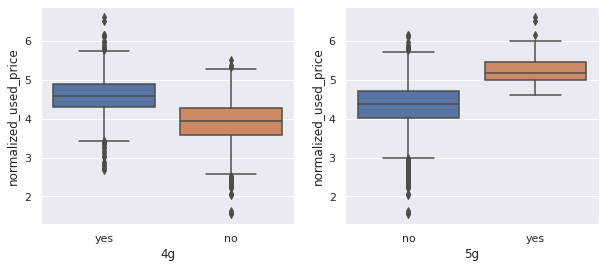

In [ ]:
plt.figure(figsize=(10, 4))

plt.subplot(121)
sns.boxplot(data=df, x="4g", y="normalized_used_price")

plt.subplot(122)
sns.boxplot(data=df, x="5g", y="normalized_used_price")

plt.show()

Observation: The boxplot is showing 4g is lower than 5g with normalized used price.

**Data Preparation for modeling**
* We want to predict the normalized price of used devices
* Before we proceed to build a model, we'll have to encode categorical features
* We'll split the data into train and test to be able to evaluate the model that we build on the train data
* We will build a Linear Regression model using the train data and then check it's performance


**Correlation Check**
7. Which attributes are highly correlated with the normalized price of a used device?

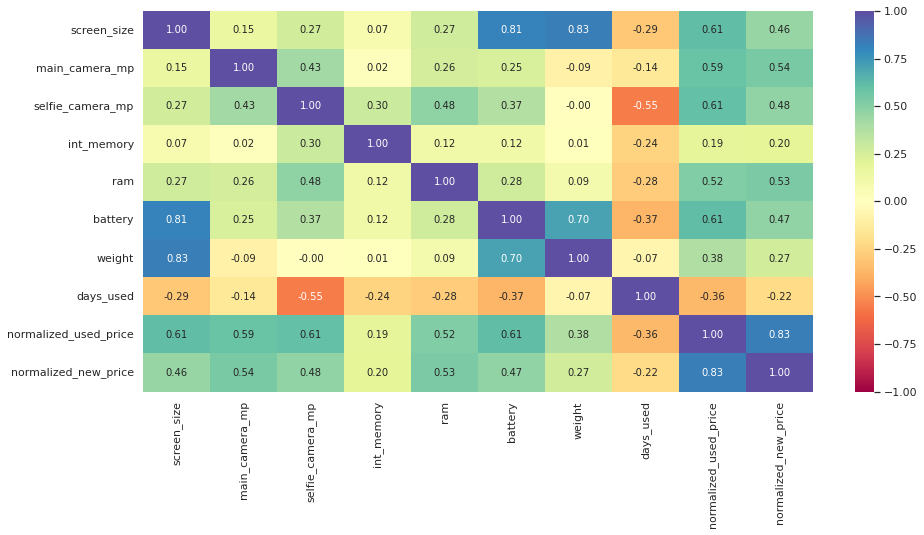

In [ ]:
cols_list = df.select_dtypes(include=np.number).columns.tolist()
# dropping release_year as it is a temporal variable
cols_list.remove("release_year")

plt.figure(figsize=(15, 7))
sns.heatmap(
    df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

**Observation: ** This heap map presents highly correlated weight and battery has high correlation with scrreen size.

#  **Data Preprocessing**


**Missing Value Imputation**
* We will impute the missing values in the data by the column medians grouped by release_year and brand_name.

In [ ]:
# let's create a copy of the data
df1 = df.copy()

In [ ]:
# checking for missing values
df1.isnull().sum() ## Complete the code to check missing values in all the columns

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

In [ ]:
cols_impute = [
    "main_camera_mp",
    "selfie_camera_mp",
    "int_memory",
    "ram",
    "battery",
    "weight",
]

for col in cols_impute:
    df1[col] = df1[col].fillna(
        value=df1.groupby(['release_year'])[col].transform("median")
    )   ## Complete the code to impute missing values in cols_impute with median by grouping the data on release year and brand name
    df1.isnull().sum()

* We will impute the remaining missing values in the data by the column medians grouped by brand_name.

In [ ]:
cols_impute = [
    "main_camera_mp",
    "selfie_camera_mp",
    "battery",
    "weight",
]

for col in cols_impute:
    df1[col] = df1[col].fillna(
        value=df1.groupby(['brand_name'])[col].transform("median")
    ) ## Complete the code to impute the missing values in cols_impute with median by grouping the data on brand name

# checking for missing values
df1.isnull().sum() ## Complete the code to check missing values after imputing the above columns

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

* We will fill the remaining missing values in the main_camera_mp column by the column median.

In [ ]:
df1["main_camera_mp"] = df1["main_camera_mp"].fillna(df1["main_camera_mp"].median) ## Complete the code to impute the data with median
# checking for missing values
df1.isnull().sum() ## Complete the code to check missing values after imputing the above columns


brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

**Feature Engineering**
* Let's create a new column years_since_release from the release_year column.
* We will consider the year of data collection, 2021, as the baseline.
* We will drop the release_year column.

In [ ]:
df1["years_since_release"] = 2021 - df1["release_year"]
df1.drop("release_year", axis=1, inplace=True)
df1["years_since_release"].describe()

count    3454.000000
mean        5.034742
std         2.298455
min         1.000000
25%         3.000000
50%         5.500000
75%         7.000000
max         8.000000
Name: years_since_release, dtype: float64

**Outlier Check**
* Let's check for outliers in the data.

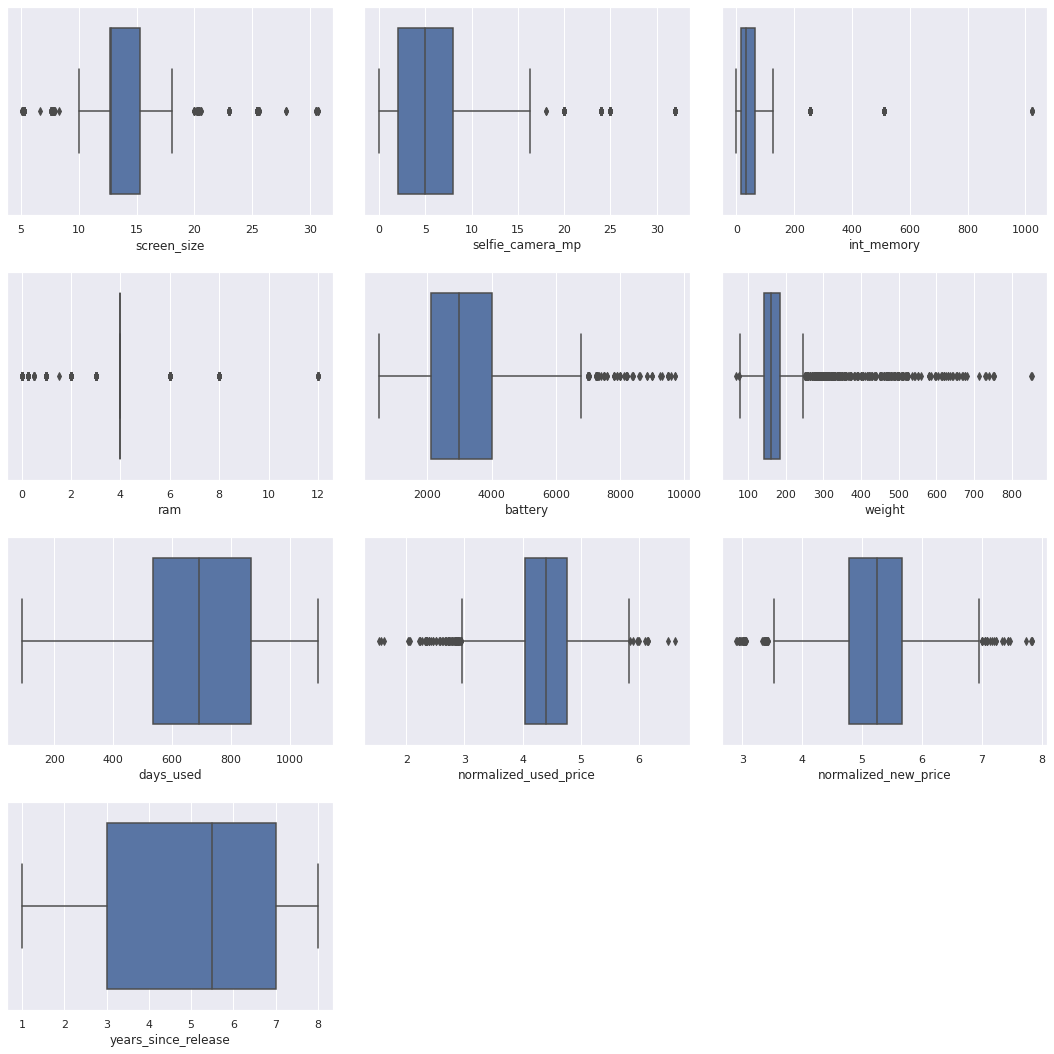

In [ ]:
# outlier detection using boxplot
num_cols = df1.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 15))

for i, variable in enumerate(num_cols):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(data=df1, x=variable)
    plt.tight_layout(pad=2)

plt.show()

**Observation:** There is no outlier is year_since_relased and days_used.

In [ ]:
df.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


**Data Preparation for modeling**


In [ ]:
## Complete the code to define the dependent and independent variables
X = df1.drop(["normalized_used_price"], axis=1)
y = df1["normalized_used_price"]

print(X.head())
print()
print(y.head())

  brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android        14.50  yes   no            13.0   
1      Honor  Android        17.30  yes  yes            13.0   
2      Honor  Android        16.69  yes  yes            13.0   
3      Honor  Android        25.50  yes  yes            13.0   
4      Honor  Android        15.32  yes   no            13.0   

   selfie_camera_mp  int_memory  ram  battery  weight  release_year  \
0               5.0        64.0  3.0   3020.0   146.0          2020   
1              16.0       128.0  8.0   4300.0   213.0          2020   
2               8.0       128.0  8.0   4200.0   213.0          2020   
3               8.0        64.0  6.0   7250.0   480.0          2020   
4               8.0        64.0  3.0   5000.0   185.0          2020   

   days_used  normalized_new_price  
0        127              4.715100  
1        325              5.519018  
2        162              5.884631  
3        345              5.630961  
4  

In [ ]:
# let's add the intercept to data
X = sm.add_constant(X)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
# creating dummy variables
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)  ## Complete the code to create dummies for independent features

X.head()

,const,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,...,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,1.0,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,...,0,0,0,0,0,0,0,0,1,0
1,1.0,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,...,0,0,0,0,0,0,0,0,1,1
2,1.0,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,...,0,0,0,0,0,0,0,0,1,1
3,1.0,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,...,0,0,0,0,0,0,0,0,1,1
4,1.0,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
# splitting the data in 70:30 ratio for train to test data

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) ## Complete the code to split the data into train and test in specified ratio

In [ ]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 2417
Number of rows in test data = 1037


**Observations:**
* predict the normalized price of used devices
* Encode categorical features
* Split the data into train and test to be able to evaluate the model that we build on the train data
* Build a Linear Regression model using the train data and then check it's performance

## Model Building - Linear Regression

In [ ]:
olsmodel1 = sm.OLS(y_train, x_train).fit() ## Complete the code to fit OLS model
print(olsmodel1.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.845
Model:                               OLS   Adj. R-squared:                  0.841
Method:                    Least Squares   F-statistic:                     268.1
Date:                   Sat, 09 Jul 2022   Prob (F-statistic):               0.00
Time:                           00:07:23   Log-Likelihood:                 121.53
No. Observations:                   2417   AIC:                            -145.1
Df Residuals:                       2368   BIC:                             138.7
Df Model:                             48                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


**Let's check the performance of the model using different metrics.**

* Metric functions defined in sklearn for RMSE, MAE, and R2.
* Function to calculate MAPE and adjusted R2.
* Function which will print out all the above metrics in one go.

In [ ]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100
    # function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [ ]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel1_train_perf = model_performance_regression(olsmodel1, x_train, y_train)
olsmodel1_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.230105,0.180571,0.844587,0.84137,4.332694


## Model Performance Check

In [ ]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel1_test_perf = model_performance_regression(olsmodel1, x_test, y_test) ## Complete the code to check the performance on test data
olsmodel1_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.239083,0.185073,0.841519,0.833651,4.511746


## Checking Linear Regression Assumptions

We will be checking the following Linear Regression assumptions:
1.   No Multicollinearity
2.   Linearity of variables
1.   Independence of error terms
2.   Normality of error terms
1.   No Heteroscedasticity


**TEST FOR MULTICOLLINEARITY**

We will test for multicollinearity using VIF.

**General Rule of thumb:**

*   If VIF is 1 then there is no correlation between the kth predictor and the remaining predictor variables.
*   If VIF exceeds 5 or is close to exceeding 5, we say there is moderate multicollinearity.
*   If VIF is 10 or exceeding 10, it shows signs of high multicollinearity.
Let's define a function to check VIF.







In [ ]:
#Let's define a function to check VIF.def checking_vif(predictors):
from statsmodels.stats.outliers_influence import variance_inflation_factor


def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [ ]:
checking_vif(x_train)  ## Complete the code to check VIF on train data

,feature,VIF
0,const,3.785475e+06
1,screen_size,7.681828e+00
2,main_camera_mp,2.201190e+00
3,selfie_camera_mp,2.811591e+00
4,int_memory,1.361251e+00
5,ram,2.239531e+00
6,battery,4.042104e+00
7,weight,6.372828e+00
8,release_year,4.891179e+00
9,days_used,2.668030e+00


**Removing Multicollinearity (if needed)**
To remove multicollinearity


1.  Drop every column one by one that has a VIF score greater than 5.
1.   Look at the adjusted R-squared and RMSE of all these models.
2.   Drop the variable that makes the least change in adjusted R-squared.
1.   Check the VIF scores again.
2.   Continue till you get all VIF scores under 5.

Let's define a function that will help us do this.

In [ ]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [ ]:
col_list = ["screen_size", "weight"] ## Complete the code to specify the columns with high VIF

res = treating_multicollinearity(x_train, y_train, col_list) ## Complete the code to check the effect on model performance after dropping specified columns from train data
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,screen_size,0.838089,0.234915
1,weight,0.837839,0.235096


In [ ]:
col_to_drop = "screen_size" ## Complete the code to specify the column to drop
x_train2 = x_train.loc[:, ~x_train.columns.str.startswith(col_to_drop)] ## Complete the code to specify the train data from which to drop the column specified
x_test2 = x_test.loc[:, ~x_test.columns.str.startswith(col_to_drop)] ## Complete the code to specify the test data from which to drop the column specified

# Check VIF now
vif = checking_vif(x_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  screen_size


,feature,VIF
0,const,3.659408e+06
1,main_camera_mp,2.197986e+00
2,selfie_camera_mp,2.808155e+00
3,int_memory,1.359116e+00
4,ram,2.239531e+00
5,battery,3.805616e+00
6,weight,2.960856e+00
7,release_year,4.724063e+00
8,days_used,2.656096e+00
9,normalized_new_price,3.102312e+00


**Observations:**
* None of the common variables (brand_name, os, screen_size, 4g, 5g, main_camer_mp, int_memory, ram, battery, weight, release_year, days_used, normalized_used_price, normalized_new_price) show moderate or high multicollinearity.
* Dropping the high p-value of brand_name_others, brand_name_Huawei, brand_name_Samsung these variables do not significantly impact the target variables.

**Dropping high p-value variables (if needed)**
* We will drop the predictor variables having a p-value greater than 0.05 as they do not significantly impact the target variable.
* But sometimes p-values change after dropping a variable. So, we'll not drop all variables at once.
* Instead, we will do the following:
 * Build a model, check the p-values of the variables, and drop the column with the highest p-value.
 * Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value.
 * Repeat the above two steps till there are no columns with p-value > 0.05.

The above process can also be done manually by picking one variable at a time that has a high p-value, dropping it, and building a model again. But that might be a little tedious and using a loop will be more efficient.

In [ ]:
# initial list of columns
predictors = x_train2.copy()  ## Complete the code to check for p-values on the right dataset
cols = predictors.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = predictors[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'main_camera_mp', 'selfie_camera_mp', 'ram', 'weight', 'release_year', 'normalized_new_price', 'brand_name_Others', 'brand_name_Samsung', 'brand_name_Sony', 'brand_name_Xiaomi', 'os_Others', 'os_iOS', '4g_yes']


In [ ]:
x_train3 = x_train2[selected_features]  ## Complete the code to specify the train data from which to select the specified columns
x_test3 = x_test2[selected_features]  ## Complete the code to specify the test data from which to select the specified columns

In [ ]:
olsmodel2 = sm.OLS(y_train, x_train3).fit() ## Complete the code fit OLS() on updated dataset (no multicollinearity and no insignificant predictors)
print(olsmodel2.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     963.0
Date:                   Sat, 09 Jul 2022   Prob (F-statistic):               0.00
Time:                           00:38:57   Log-Likelihood:                 78.551
No. Observations:                   2417   AIC:                            -129.1
Df Residuals:                       2403   BIC:                            -48.04
Df Model:                             13                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

**Observations:**
* Dropping the high p-value predictor variables has not adversely affected the model performance.
* This shows that these variables do not significantly impact the target variable.

In [ ]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel2_train_perf = model_performance_regression(olsmodel2, x_train3, y_train) ## Complete the code to check performance on train data
olsmodel2_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.234233,0.183132,0.838961,0.838022,4.402623


In [ ]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel2_test_perf = model_performance_regression(olsmodel2, x_test3, y_test) ## Complete the code to check performance on test data
olsmodel2_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.24109,0.18629,0.838847,0.83664,4.547497


**Oservations: ** The metric functions defined in sklearn for RMSE is 0.23 and MAE 0.18), and R2 is 83% and MAPE is 4.5%  Hence, we can conclude the model olsmod2 is good for prediction.  

**Now We will be checking the rest of assumption on olsmod2.**
1.   Linearity of variables
2.   Independence of error terms
2.   Normality of error terms
1.   No Heteroscedasticity

**TEST FOR LINEARITY AND INDEPENDENCE**
* We will test for linearity and independence by making a plot of fitted values vs residuals and checking for patterns.
* If there is no pattern, then we say the model is linear and residuals are independent.
* Otherwise, the model is showing signs of non-linearity and residuals are not independent.

In [ ]:
# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmodel2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmodel2.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
3026,4.087488,3.877460,0.210027
1525,4.448399,4.607293,-0.158894
1128,4.315353,4.296823,0.018529
3003,4.282068,4.244393,0.037675
2907,4.456438,4.466561,-0.010123


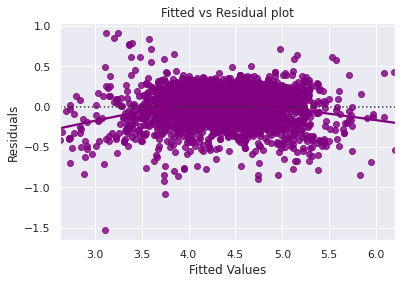

In [ ]:
# let's plot the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

**Observations:** This plot present there is no pattern. We can say that, the assumptions of linearity and independence are satisfied.

**TEST FOR NORMALITY**
* We will test for normality by checking the distribution of residuals, by checking the Q-Q plot of residuals, and by using the Shapiro-Wilk test.
* If the residuals follow a normal distribution, they will make a straight line plot, otherwise not.
* If the p-value of the Shapiro-Wilk test is greater than 0.05, we can say the residuals are normally distributed.

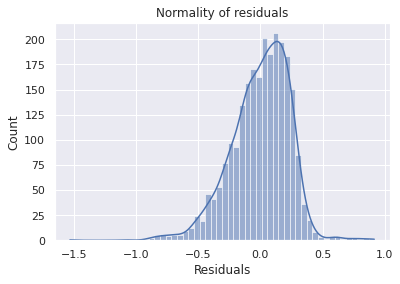

In [ ]:
sns.histplot(data=df_pred, x="Residuals", kde=True) ## Complete the code to plot the distribution of residuals
plt.title("Normality of residuals")
plt.show()

**Observations:** It is observed as similar to the bell-shaped pattern when plotting a histograph of residuals. Now, check the Q-Q plot.

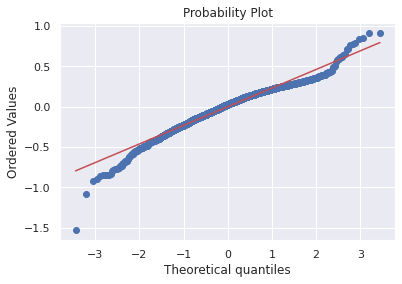

In [ ]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab) ## Complete the code check Q-Q plot
plt.show()

**Observations:** The normal probability plot of residual is approximately follow a linear line. Now, check the results of the Shapiro-Wilk test.

In [ ]:
stats.shapiro(df_pred["Residuals"]) ## Complete the code to apply the Shapiro-Wilks test

(0.9687986969947815, 1.6761957590028694e-22)

**Observations:** Since p-value < 0.05, the residuals are not normal as per the Shapiro-Wilk test.
However, based on the distribution plot and Q-Q plot, we can consider the distribution to be a good approximation of the normal distribution.
So, the assumption is satisfied.

**TEST FOR HOMOSCEDASTICITY**
* We will test for homoscedasticity by using the goldfeldquandt test.
* If we get a p-value greater than 0.05, we can say that the residuals are homoscedastic. Otherwise, they are heteroscedastic.

In [ ]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train3) ## Complete the code with the right train data to apply the Goldfeldquandt test
lzip(name, test)

[('F statistic', 1.0092547146589552), ('p-value', 0.4367683961009923)]

**Observations:** If the p-value given by the Goldfeldquant test, at 5 percent level of significance > 0.05. It is concluded that the residuals of linear regression are homoscedastic.

**Predictions on test data**
Now that we have checked all the assumptions of linear regression and they are satisfied, let's go ahead with prediction.

In [ ]:
# predictions on the test set
pred = olsmodel2.predict(x_test3)

df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred})
df_pred_test.sample(10, random_state=1)

,Actual,Predicted
1995,4.566741,4.392269
2341,3.696103,3.983448
1913,3.592093,3.654164
688,4.306495,4.078154
650,4.522115,5.109482
2291,4.259294,4.372728
40,4.997685,5.463827
1884,3.875359,4.063095
2538,4.206631,4.036947
45,5.380450,5.293992


## Final Model
Let's recreate the final model and print it's summary to gain insights.

In [ ]:
x_train_final = x_train3.copy()
x_test_final = x_test3.copy()

In [ ]:
olsmodel_final = sm.OLS(y_train, x_train_final).fit() ## Complete the code to fit the final model
print(olsmodel_final.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     963.0
Date:                   Sat, 09 Jul 2022   Prob (F-statistic):               0.00
Time:                           00:54:03   Log-Likelihood:                 78.551
No. Observations:                   2417   AIC:                            -129.1
Df Residuals:                       2403   BIC:                            -48.04
Df Model:                             13                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [ ]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_final_train_perf = model_performance_regression(olsmodel_final, x_train_final, y_train) ## Complete the code to check the performance on train data
olsmodel_final_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.234233,0.183132,0.838961,0.838022,4.402623


In [ ]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_final_test_perf = model_performance_regression(olsmodel_final, x_test_final, y_test) ## Complete the code to check performance on test data
olsmodel_final_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.24109,0.18629,0.838847,0.83664,4.547497


## Actionable Insights and Recommendations



* From the observation, it was observed that the more than 90 percent used device market is dominated by the Android devices.
* From the observation that release year from 2013 to 2020 increasing corresponding to normalized used price is increased in the phone market.
* From the observation, it was observed that the effect of converted status of language is independent on preferred language.
* From the observation, it was observed that we * The metric functions defined in sklearn for RMSE is 0.23 and MAE 0.18), and R2 is 83% and MAPE is 4.5% Therefore, we can conclude the model olsmod2 is good for prediction and not suffering with overfitting.
* From the observation to observe highly correlated weight and battery has high correlation with screen size.
* From the business recommendation, it is encouraging use to non-linear modeling to improve the effective and better prediction of model.
* Based on above overservaton the linear model were sucessfuly work. Hence it is concluded that multicoliinarity, variance inflection factor, homosedasticity approached.
* We need to approach some non-linear design approach plan to updated on phone device.




___